# 決定木モデルの作成

## 決定木モデルの概要

* 質問に対する分岐を階層的に作ることで、判別／回帰を行うモデル
* パラメータ調整を適切にしないと過学習しやすい
* このケースでは顧客が定額預金申し込みをするかしないかの **分類** を予測し、評価尺度は **AUC** （1が最も良い）を用いる

## 対象データ

ここではSIGNATEの[【練習問題】銀行の顧客ターゲティングデータ](https://signate.jp/competitions/1/data)を使用している

### train.csv（学習データ）

* 説明変数：目的変数以外の全て
* 目的変数：y（定額預金申し込み有無）

### test.csv（評価データ）

* 説明変数：全て


## データの準備

必要に応じてGraphvizをインストールしておく

In [ ]:
# 必要なライブラリ（Notebook環境によっては既に入っている）
!pip install -q graphviz


ライブラリのインポート

**DecisionTreeClassifier** は決定木用のライブラリ

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import export_graphviz

import graphviz
from IPython.display import Image, display

CSVデータの読み込み

In [2]:
train = pd.read_csv('data/customer_targeting/train.csv')
test = pd.read_csv('data/customer_targeting/test.csv')
sample = pd.read_csv('data/customer_targeting/submit_sample.csv', header=None)

学習データと評価データの先頭行を確認する

In [3]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


In [4]:
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown


## 説明変数と目的変数の設定

* 学習データの説明変数を抽出する
* 目的変数y以外のカラムを説明変数に設定する

説明変数に全ての行と、最初から17列目までを指定する

In [5]:
trainX = train.iloc[:, 0:17]

内容を確認する

In [6]:
trainX.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success


学習データの目的変数を抽出する

In [7]:
y = train['y']

評価データの説明変数を抽出する

全カラムを説明変数に設定する

In [8]:
testX = test.copy()

質的データをダミー変数化する

In [9]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

train と test で one-hot 後の列を揃える（列ズレ防止）

In [10]:
testX = testX.reindex(columns=trainX.columns, fill_value=0)

## モデルの準備

### モデルを表す変数を用意する

In [11]:
clf = DT(max_depth=2, min_samples_leaf=500)

## モデルの作成

### fit関数でモデルを作成する

説明変数、目的変数の順に指定

In [12]:
clf.fit(trainX, y)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",500
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curren

## 決定木を可視化する

決定木の図のデータをdotファイルで書き出す
* Windowsの場合は別途 Graphviz 本体をインストールし、dot が PATH から実行できる必要がある
* 例: C:\Program Files\Graphviz\bin を環境変数 PATH に追加 → `dot -V` が通ることを確認


In [13]:
dot = export_graphviz(clf, feature_names=trainX.columns.tolist(), class_names=['0', '1'], filled=True, rounded=True,)
src = graphviz.Source(dot)

ファイルとして保存（tree.png）

In [14]:
src.render('data/customer_targeting/output_tree', format='png', cleanup=True)

'data\\customer_targeting\\output_tree.png'

書き出したデータを表示する

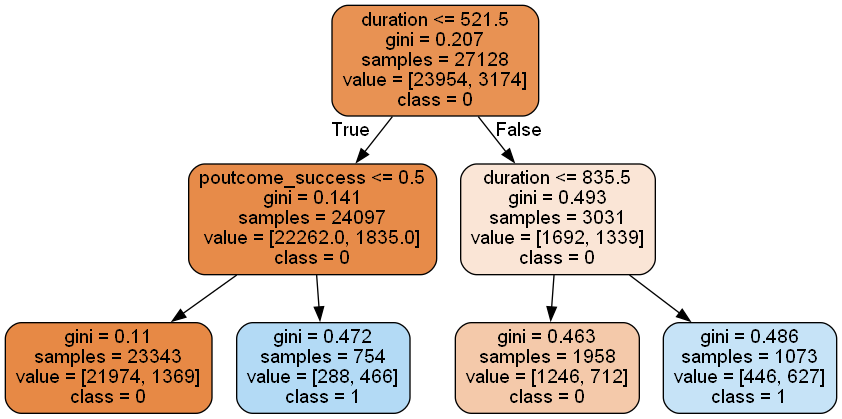

In [15]:
display(Image(filename='data/customer_targeting/output_tree.png', width=1200))

Windows環境で利用する場合の対応
* Graphvizをインストールしパスを通しておく
* `ExecutableNotFound: dot` が出る場合は Graphviz 本体が見つかっていない

企業PCなどで PATH を変更できない場合は一時的に Python から PATH を足す
* import os
* os.environ['PATH'] += os.pathsep + r'C:\Program Files\Graphviz\bin'

predict関数を使った予測結果を変数に代入する

In [16]:
pred = clf.predict_proba(testX)

変数を表示するとそれぞれの行に **[ 0である確率、1である確率 ]** が含まれている事がわかる

In [17]:
pred

array([[0.41565704, 0.58434296],
       [0.41565704, 0.58434296],
       [0.94135287, 0.05864713],
       ...,
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713],
       [0.94135287, 0.05864713]], shape=(18083, 2))

予測するのは **定額預金を申し込む確率** なので1である確率のみを抽出する

In [18]:
pred = np.asarray(clf.predict_proba(testX))
pred = pred[:, 1]

In [19]:
pred

array([0.58434296, 0.58434296, 0.05864713, ..., 0.05864713, 0.05864713,
       0.05864713], shape=(18083,))

## モデルの評価

### SIGNATEで評価する形式にデータを加工する

sampleファイルのカラム[1]に、予測結果を代入する

In [20]:
sample.head()

,0,1
0,1,0.236
1,2,0.128
2,3,0.903
3,4,0.782
4,5,0.597


In [21]:
sample[1] = pred

In [22]:
sample.head()

,0,1
0,1,0.584343
1,2,0.584343
2,3,0.058647
3,4,0.058647
4,5,0.058647


sampleをCSVファイルに書き出す

In [23]:
sample.to_csv('data/customer_targeting/output_submit1_bank.csv', index=False, header=False)

書き出したファイルを[SIGNATE](https://signate.jp/competitions/1/data)に投稿して評価を確認する